In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import numpy as np
import yfinance as yf
import pandas as pd
import sklearn as skl
import math as math
import talib as talib

In [2]:
from datetime import datetime, timedelta
tomorrow = datetime.today() + timedelta(1)
tomorrow.strftime('%Y-%m-%d')

'2022-01-15'

In [3]:
df = yf.download('^NSEI',start= "2020-01-16",end = tomorrow.strftime('%Y-%m-%d'), interval = '1h' )

[*********************100%***********************]  1 of 1 completed


In [4]:
df['Index'] = df.index
date = df.index

df['Time'] = date.strftime("%H:%M:%S")
df['Date'] = date.strftime("%m/%d/%Y")

df_fin = df.drop(['Index'], axis = 1)

##Flag for open
df_fin.loc[df['Time'] == "09:15:00", 'Open_flag'] = 1
df_fin.loc[df['Time'] != "09:15:00", 'Open_flag'] = 0
df_fin['Row_Cnt'] = np.arange(len(df_fin))

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Index,Time,Date
2020-01-16 09:15:00+05:30,12347.099609,12389.000000,12345.700195,12371.400391,12371.400391,0,2020-01-16 09:15:00+05:30,09:15:00,01/16/2020
2020-01-16 10:15:00+05:30,12377.900391,12381.150391,12315.849609,12321.400391,12321.400391,0,2020-01-16 10:15:00+05:30,10:15:00,01/16/2020
2020-01-16 11:15:00+05:30,12338.200195,12339.200195,12315.849609,12330.650391,12330.650391,0,2020-01-16 11:15:00+05:30,11:15:00,01/16/2020
2020-01-16 12:15:00+05:30,12332.599609,12356.450195,12321.650391,12354.900391,12354.900391,0,2020-01-16 12:15:00+05:30,12:15:00,01/16/2020
2020-01-16 13:15:00+05:30,12337.049805,12368.049805,12337.049805,12364.400391,12364.400391,0,2020-01-16 13:15:00+05:30,13:15:00,01/16/2020


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Index,Time,Date
2022-01-14 11:15:00+05:30,18185.949219,18197.900391,18141.650391,18195.750000,18195.750000,0,2022-01-14 11:15:00+05:30,11:15:00,01/14/2022
2022-01-14 12:15:00+05:30,18195.900391,18226.500000,18179.849609,18218.300781,18218.300781,0,2022-01-14 12:15:00+05:30,12:15:00,01/14/2022
2022-01-14 13:15:00+05:30,18218.449219,18251.150391,18210.750000,18226.400391,18226.400391,0,2022-01-14 13:15:00+05:30,13:15:00,01/14/2022
2022-01-14 14:15:00+05:30,18227.150391,18286.599609,18217.500000,18255.199219,18255.199219,0,2022-01-14 14:15:00+05:30,14:15:00,01/14/2022
2022-01-14 15:15:00+05:30,18255.000000,18258.800781,18233.150391,18235.500000,18235.500000,0,2022-01-14 15:15:00+05:30,15:15:00,01/14/2022


In [7]:
##Independent Variables
#EMA 8-21 Gap
#EMA 21-100 Gap
#RSI
#ADX - Positive DI Negative DI


#Dependent Variable
#Returns Next 5 candles
#Returns Next 10 candles
#Returns Next 15 candles
#Some kind of average of these

In [8]:
df_fin['Close'].

SyntaxError: invalid syntax (<ipython-input-8-2efea316f2cf>, line 1)

In [15]:
df_fin.to_csv('test_file.csv')

In [8]:
##Return
df_fin['Change'] = df_fin['Close'].diff()
df_fin['Change_Perc'] = df_fin['Close'].diff()/df_fin['Close'].shift()
df_fin['Open_Close_Change'] =  df_fin['Close'] - df_fin['Open'] 
df_fin['Perc_Change_Five'] = df_fin['Close'].diff(-5)/df_fin['Close']
df_fin['Perc_Change_Ten'] = df_fin['Close'].diff(-10)/df_fin['Close']
df_fin['Perc_Change_Fifteen'] = df_fin['Close'].diff(-15)/df_fin['Close']
df_fin['Perc_Change_Twenty'] = df_fin['Close'].diff(-20)/df_fin['Close']

df_fin['Avg_Change'] = (df_fin['Perc_Change_Five'] + df_fin['Perc_Change_Ten'] + df_fin['Perc_Change_Fifteen'] + df_fin['Perc_Change_Twenty'])/4

In [10]:
##Independent Variables Pull

In [9]:
#Trend

#MA 8-21 Gap

##EMA 
df_fin['EMA_8'] = df_fin['Close'].ewm(span=8).mean()
df_fin['EMA_21'] = df_fin['Close'].ewm(span=21).mean()
df_fin['EMA_8_21_GAP'] = df_fin['Close'].ewm(span=21).mean() - df_fin['Close'].ewm(span=8).mean()
df_fin['EMA_8_21_GAP_Perc'] = (df_fin['Close'].ewm(span=21).mean() - df_fin['Close'].ewm(span=8).mean())/df_fin['Close'].ewm(span=8).mean()



In [11]:
df_fin[['SMA_8','SMA_21','SMA_8_21_GAP','SMA_8_21_GAP_Perc']].tail()

KeyError: "None of [Index(['SMA_8', 'SMA_21', 'SMA_8_21_GAP', 'SMA_8_21_GAP_Perc'], dtype='object')] are in the [columns]"

In [12]:
df_fin[['EMA_8','EMA_21','EMA_8_21_GAP','EMA_8_21_GAP_Perc']].tail()

,EMA_8,EMA_21,EMA_8_21_GAP,EMA_8_21_GAP_Perc
2022-01-14 11:15:00+05:30,18210.176019,18161.149856,-49.026162,-0.002692
2022-01-14 12:15:00+05:30,18211.981521,18166.345395,-45.636127,-0.002506
2022-01-14 13:15:00+05:30,18215.185715,18171.804940,-43.380775,-0.002382
2022-01-14 14:15:00+05:30,18224.077604,18179.386238,-44.691366,-0.002452
2022-01-14 15:15:00+05:30,18226.615915,18184.487489,-42.128425,-0.002311


In [11]:
#Momentum
Close = df_fin.Close
High = df_fin.High
Low = df_fin.Low
Open = df_fin.Open
df_fin['ADX'] = talib.ADX(High, Low, Close, timeperiod = 14)
df_fin['PLUS_DI'] = talib.PLUS_DI(High, Low, Close, timeperiod=14)
df_fin['MINUS_DI'] = talib.MINUS_DI(High, Low, Close, timeperiod=14)
df_fin['CCI'] = talib.CCI(High, Low, Close, timeperiod=14)
df_fin['BOP'] = talib.BOP(Open, High, Low, Close)
df_fin['BOP'] = talib.MOM(Close, timeperiod=14)
df_fin['BOP'] = talib.ROCP(Close, timeperiod=14)
df_fin['NATR'] = talib.NATR(High, Low, Close, timeperiod=14)


In [12]:
#Trend
df_fin['RSI'] = talib.RSI(Close, timeperiod=14) / talib.RSI(Close, timeperiod=14).mean()

upperband, middleband, lowerband = talib.BBANDS(Close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
df_fin['BB_UPPER_LOWER_DIFF'] = (upperband - lowerband)/Close


In [13]:
df_fin.dropna(axis = 0, how = 'any', inplace = True)

In [20]:
df_fin.head()
df_fin.to_csv('nifty_testing_file2.csv')

<AxesSubplot:>

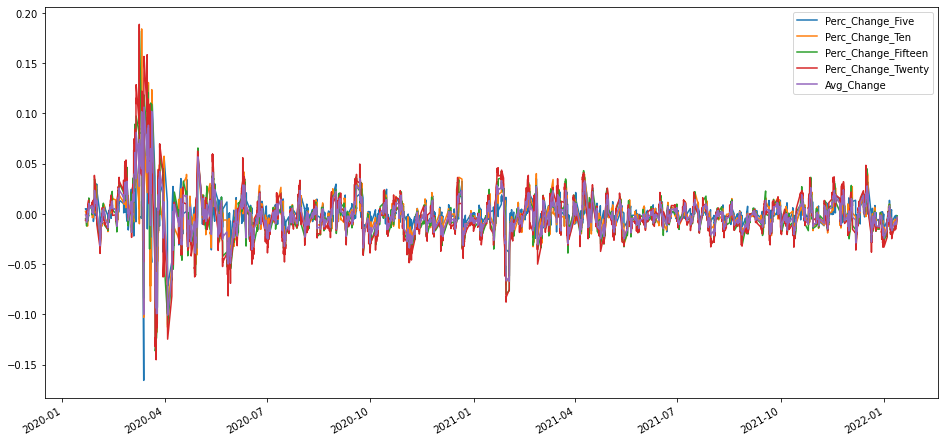

In [16]:
df_fin[['Perc_Change_Five', 'Perc_Change_Ten','Perc_Change_Fifteen','Perc_Change_Twenty','Avg_Change']].plot(label='Returns', 
                                  figsize=(16, 8))

<AxesSubplot:>

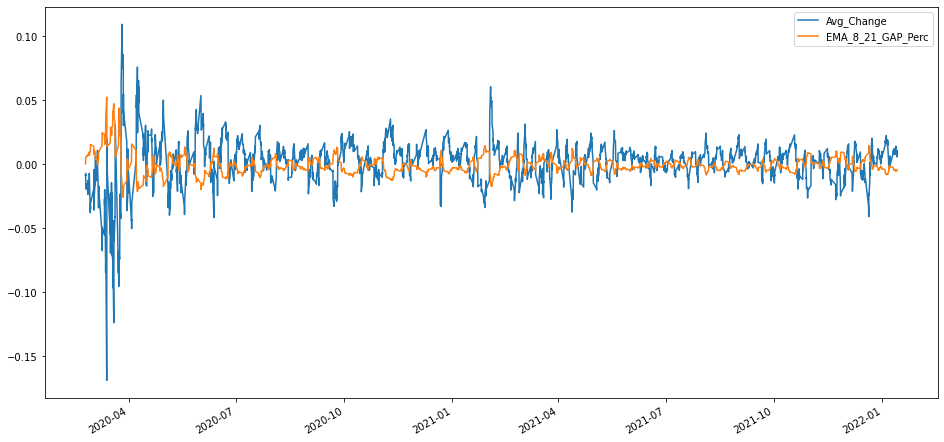

In [19]:
df_fin[['Avg_Change','EMA_8_21_GAP_Perc']].plot(label='Returns', 
                                  figsize=(16, 8))

In [17]:
X_Test['EMA_8_21_GAP_Perc'].corr(Y_Test['Avg_Change'])

NameError: name 'X_Test' is not defined

In [14]:
df_fin['ADX'] = df_fin['ADX']/100
df_fin['CCI'] = df_fin['CCI']/100

In [15]:
#Create Train & Test
df_fin_train = df_fin[df_fin['Row_Cnt'] <= 2800]
df_fin_test = df_fin[df_fin['Row_Cnt'] > 2800]

In [17]:
X_Train = df_fin_train[['EMA_8_21_GAP_Perc', 'ADX',  'CCI',  'BB_UPPER_LOWER_DIFF','NATR']]
Y_Train = df_fin_train[['Avg_Change']]
X_Test = df_fin_test[['EMA_8_21_GAP_Perc', 'ADX',  'CCI',  'BB_UPPER_LOWER_DIFF','NATR']]
Y_Test = df_fin_test[['Avg_Change']]
#'PLUS_DI', 'MINUS_DI','BOP', 'RSI',

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from numpy import mean
from numpy import std
from numpy import absolute

# define model
model1 = Ridge(alpha=0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model1, X_Train, Y_Train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

model1.fit(X_Train, Y_Train)

y_hat = model1.predict(X_Test)
y_true = np.squeeze(Y_Test.values)

Mean MAE: 0.012 (0.001)


In [19]:
# grid search hyperparameters for ridge regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

model1 = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model1, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_Train, Y_Train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.012
Config: {'alpha': 0.0}


In [20]:
from sklearn.metrics import r2_score
r2_score(y_true, y_hat)

-0.031841356982569735

In [21]:
import statsmodels.api as sm
mod = sm.OLS(Y_Train, X_Train)
res = mod.fit()
print(res.summary())
y_pred_OLS = res.predict(X_Test).values
y_true_OLS = np.squeeze(Y_Test.values)

                                 OLS Regression Results                                
Dep. Variable:             Avg_Change   R-squared (uncentered):                   0.013
Model:                            OLS   Adj. R-squared (uncentered):              0.011
Method:                 Least Squares   F-statistic:                              7.129
Date:                Fri, 14 Jan 2022   Prob (F-statistic):                    1.23e-06
Time:                        22:11:41   Log-Likelihood:                          7131.3
No. Observations:                2774   AIC:                                 -1.425e+04
Df Residuals:                    2769   BIC:                                 -1.422e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [22]:
from sklearn.metrics import r2_score
r2_score(y_true_OLS, y_pred_OLS)

-0.03246308828348843

In [23]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score

pls2 = PLSRegression(n_components=2)
pls2.fit(X_Train, Y_Train)
PLSRegression()
Y_pred_PLS = pls2.predict(X_Test)

r2_score(y_true, Y_pred_PLS)


-0.0288059999118202

In [24]:
df_fin_train[['Avg_Change','EMA_8_21_GAP_Perc', 'ADX',  'CCI',  'BB_UPPER_LOWER_DIFF','NATR']].corr()
#'Perc_Change_Five','Perc_Change_Ten','Perc_Change_Fifteen',

,Avg_Change,EMA_8_21_GAP_Perc,ADX,CCI,BB_UPPER_LOWER_DIFF,NATR
Avg_Change,1.000000,0.085299,0.129897,-0.021993,0.069190,0.069785
EMA_8_21_GAP_Perc,0.085299,1.000000,0.070048,-0.518892,0.388895,0.432460
ADX,0.129897,0.070048,1.000000,-0.004096,0.254769,0.259833
CCI,-0.021993,-0.518892,-0.004096,1.000000,-0.167989,-0.124444
BB_UPPER_LOWER_DIFF,0.069190,0.388895,0.254769,-0.167989,1.000000,0.709988
NATR,0.069785,0.432460,0.259833,-0.124444,0.709988,1.000000


In [123]:
X_Test

,EMA_8_21_GAP_Perc,ADX,CCI,BB_UPPER_LOWER_DIFF
2021-09-01 13:15:00+05:30,-0.006263,0.492844,0.588205,0.008401
2021-09-01 14:15:00+05:30,-0.005468,0.486733,0.239698,0.004307
2021-09-01 15:15:00+05:30,-0.004719,0.477800,-0.121225,0.005732
2021-09-02 09:15:00+05:30,-0.004605,0.476226,0.307133,0.006536
2021-09-02 10:15:00+05:30,-0.004622,0.476687,0.660819,0.008191
...,...,...,...,...
2022-01-11 12:15:00+05:30,-0.004717,0.290453,1.023385,0.005549
2022-01-11 13:15:00+05:30,-0.004731,0.298872,1.098891,0.006003
2022-01-11 14:15:00+05:30,-0.004592,0.297872,0.860209,0.003403
2022-01-11 15:15:00+05:30,-0.004407,0.296943,0.967043,0.002983


In [25]:
y_pred = res.predict(X_Test).values
y_true = np.squeeze(Y_Test.values)


from sklearn.metrics import r2_score
r2_score(y_true, y_pred)

-0.03246308828348843

In [26]:

pred_file = pd.DataFrame(columns =['y_pred', 'y_true'])
pred_file['Date'] = res.predict(X_Test).index

pred_file['y_pred'] = y_pred_OLS
pred_file['y_true'] = y_true_OLS
pred_file['Actual_Return'] = df_fin_test.Change_Perc.values
pred_file['Actual_Values'] = df_fin_test.Change.values

In [133]:
pred_file

,y_pred,y_true,Date,Actual_Return,Actual_Values
0,-0.002493,-0.010401,2021-09-01 13:15:00+05:30,0.000137,2.349609
1,-0.002364,-0.012409,2021-09-01 14:15:00+05:30,-0.002903,-49.701172
2,-0.002299,-0.015081,2021-09-01 15:15:00+05:30,-0.000583,-9.949219
3,-0.002118,-0.011216,2021-09-02 09:15:00+05:30,0.003933,67.099609
4,-0.002011,-0.008444,2021-09-02 10:15:00+05:30,0.001457,24.951172
...,...,...,...,...,...
621,-0.001491,-0.007628,2022-01-11 12:15:00+05:30,0.001961,35.349609
622,-0.001489,-0.008533,2022-01-11 13:15:00+05:30,0.000078,1.400391
623,-0.001513,-0.009071,2022-01-11 14:15:00+05:30,-0.000412,-7.451172
624,-0.001420,-0.008885,2022-01-11 15:15:00+05:30,0.000050,0.900391


<AxesSubplot:>

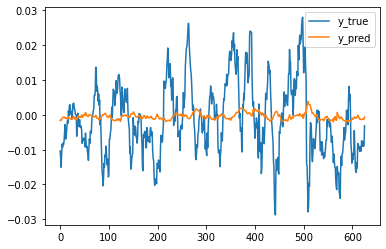

In [27]:
pred_file[['y_true','y_pred']].plot()

In [130]:

import numpy as np
from sklearn import linear_model
SGDClf = linear_model.SGDClassifier(max_iter = 10, tol=1e-3,penalty = "elasticnet")
SGDClf.fit(X_Train, Y_Train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: Unknown label type: (array([-0.100622  , -0.10001137, -0.09906458, ...,  0.10169032,
        0.10209034,  0.10632134]),)

In [127]:
pred_file.to_csv('model_pred2.csv')

In [113]:
df.to_csv('data_16012020.csv')

In [39]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_Train, Y_Train.Avg_Change)


BayesianRidge()

In [46]:
y_hat_bayesian = reg.predict(X_Test)

In [47]:
from sklearn.metrics import r2_score
r2_score(y_true, y_hat_bayesian)

-0.013877924348577153

In [ ]:
pred_file[['y_true','y_pred']].plot()